### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

* The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.
* The One-vs-One strategy splits a multi-class classification into one binary classification problem per each pair of classes.

In [70]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

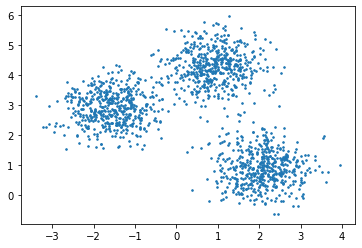

In [71]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

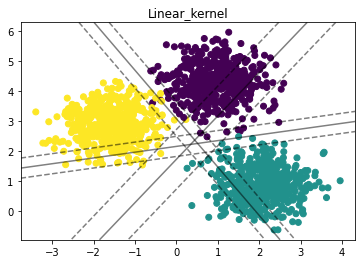

In [72]:
# Your code here

def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, marker = "x", color="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


model = SVC(kernel="linear")
one = OneVsOneClassifier(model)
one.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Linear_kernel")
for estimator in one.estimators_:
    plot_svc_decision_function(estimator)
plt.show()

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

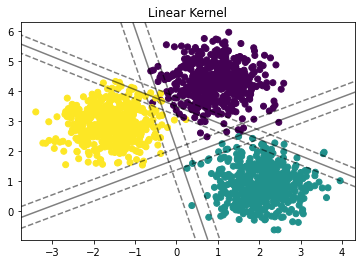

In [73]:
# Your code here

model = SVC(kernel="linear")
rest = OneVsRestClassifier(model)
rest.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Linear Kernel")
for estimator in rest.estimators_:
    plot_svc_decision_function(estimator)
plt.show()

### Using 5-fold cross validation compare the accuracies of each method

In [74]:
# Your code here
cv = KFold(5)

one_accuracy = cross_val_score(one, X, y, cv=cv)
rest_accuracy = cross_val_score(rest, X, y, cv=cv)

print(f'one vs one accuracy = {np.mean(one_accuracy)}\none vs rest accuracy = {np.mean(rest_accuracy)}')




one vs one accuracy = 0.9973333333333333
one vs rest accuracy = 0.9953333333333333
